1. Problem: Given the following dataset, we've to predict whether the HR will stay or leave the company. So, it's a classification problem.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hr-analytics-case-study/out_time.csv
/kaggle/input/hr-analytics-case-study/general_data.csv
/kaggle/input/hr-analytics-case-study/employee_survey_data.csv
/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx
/kaggle/input/hr-analytics-case-study/manager_survey_data.csv
/kaggle/input/hr-analytics-case-study/in_time.csv


2. Data insights.

In [2]:
data = pd.read_csv("/kaggle/input/hr-analytics-case-study/general_data.csv")
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Find the shape of the dataframe

In [3]:
data.shape

(4410, 24)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Convert the categorical variable into numeric variables using Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department'] = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['Gender'] = labelEncoder_X.fit_transform(data['Gender'])
data['JobRole'] = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelEncoder_X.fit_transform(data['MaritalStatus'])
data['Over18'] = labelEncoder_X.fit_transform(data['Over18'])

The dependent variable y is Attrition whether the employee will stay or not.

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
data['Attrition'] = label_encoder_y.fit_transform(data['Attrition'])

In [7]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


Check if there's any **Null value (NaN)** (Data Cleaning)

In [8]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

The columns NumCompaniesWorked and TotalWorkingYears have null values. We'll replace it by mean.

In [9]:
import math
mean_companies_worked = math.floor(data["NumCompaniesWorked"].mean())
data["NumCompaniesWorked"].fillna(mean_companies_worked, inplace = True)
mean_working_years = math.floor(data["TotalWorkingYears"].mean())
data["TotalWorkingYears"].fillna(mean_working_years, inplace = True)

In [10]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

Now, we've no more null values in any column

3. Evaluation: Trying to find if there's **Correlation between the independent variables.** 


In [11]:
corr = data.corr()
print(corr)


                              Age  Attrition  BusinessTravel  Department  \
Age                      1.000000  -0.159205        0.024751   -0.010846   
Attrition               -0.159205   1.000000        0.000074   -0.048206   
BusinessTravel           0.024751   0.000074        1.000000   -0.010982   
Department              -0.010846  -0.048206       -0.010982    1.000000   
DistanceFromHome         0.006963  -0.009730        0.024616    0.012134   
Education               -0.035706  -0.015111        0.002755   -0.004597   
EducationField           0.043194  -0.057940       -0.015462    0.013720   
EmployeeCount                 NaN        NaN             NaN         NaN   
EmployeeID               0.008649  -0.004729       -0.002590   -0.003455   
Gender                  -0.039352   0.018125       -0.039243    0.003158   
JobLevel                -0.002884  -0.010290        0.046111    0.002923   
JobRole                  0.011422   0.025809       -0.027194   -0.025466   
MaritalStatu

Using a heatmap to visualize better which variables have highest correlation

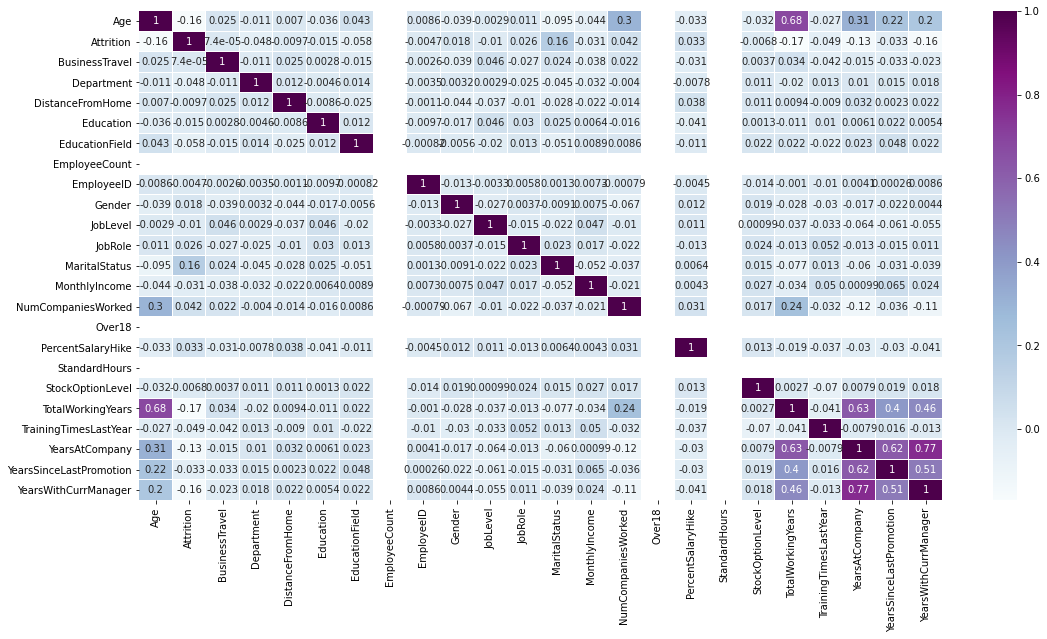

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (18, 9))
sns.heatmap(corr, annot = True, linewidth = 0.05, cmap = 'BuPu')
plt.show()

4. Features: After seeing the heatmap, I'm taking up the following independent variables. Some variables are omitted which have the least pairwise correlation between the independent variable and dependent variable "Attrition". There are no derived features used in this model.

In [13]:
X = data[['Age', 'EducationField', 'Gender', 'JobLevel',
          'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y = data["Attrition"]

In [14]:
X

,Age,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2
4408,42,3,1,1,2,0,23980,0.0,14,1,10.0,2,9,7,8


5. Building the model. I'll split the data using sklearn and then use Logistic regression for classification.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)


In [16]:
len(y_test)

882

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Model prediction and experiment

In [18]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
predicted_y = model.predict(X_test)

In [20]:
model.score(X_test, y_test)

0.8356009070294784

In [21]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(predicted_y, y_test) 
  
print('Confusion Matrix :')
print(results) 
print("Accuracy Score: ", accuracy_score(y_test, predicted_y))
print("Classification Report: \n", classification_report(y_test, predicted_y))


Confusion Matrix :
[[732 140]
 [  5   5]]
Accuracy Score:  0.8356009070294784
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       737
           1       0.50      0.03      0.06       145

    accuracy                           0.84       882
   macro avg       0.67      0.51      0.49       882
weighted avg       0.78      0.84      0.77       882



Conclusion: The **accuracy score is average**. I've to look into other models for making better prediction.